# Bike Sharing Demand Prediction

This assignment is a programming assignment wherein we have to build a **multiple linear regression model for the prediction of demand for shared bikes**.
We will be following the CRISP-DM framework to solve this business problem.i.e.,
1. **Business understanding**
2. **Data Understanding**
3. **Data Preparation**
4. **Data Modelling**
5. **Model Evaluation**

## 1. Business Understanding

### 1.1 Business Overview

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

### 1.2 Problem Statement

A US bike-sharing provider BoomBikes has recently **suffered considerable dips in their revenues due to the ongoing Corona pandemic**. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.<br><br>
In such an attempt, BoomBikes **aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19**. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

### 1.3 Business Objective

Understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- **Which variables are significant in predicting the demand for shared bikes.**
- **How well those variables describe the bike demands**
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### 1.4 Business Goal

We are required to **model the demand for shared bikes with the available independent variables**. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## 2 Data Understanding

### 2.1 Importing and Understanding Data

In [1]:
# First lets import the necessary variables
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Here looking at the dataset we can see that:
- **instant**: Its a record index hence we can drop it 
- **dteday**: We can extract the day from this column, and can analyse the correlation
- **season**: Its a categorical variable with season (1:spring, 2:summer, 3:fall, 4:winter) with 4 level hence can create 3 columns to apply to the model
- **yr**: year (0: 2018, 1:2019)- Categorical Variable or as the year increases we can consider it as a year column which might lead to better insights
- **mnth** : month ( 1 to 12) - Categorical Variable
- **holiday** : weather day is a holiday or not - Categorical Variable
- **weekday** : day of the week - Categorical Variable
- **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
- **weathersit** : A categorical variable with the following values 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

***We can consider all the below columns as Continuous Variables***
<br>
- **temp** : temperature in Celsius 
- **atemp**: feeling temperature in Celsius 
- **hum**: humidity
- **windspeed**: wind speed
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered

***Here in our linear regression model the target variable is 'cnt'***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# All are non null values with correct data types
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### 2.2 Visualizing the Data

Lets visualize the data to find any patterns or correlation or the important predictors of the variable

In [5]:
# importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualizing the numerical variables 

<Figure size 1440x864 with 0 Axes>

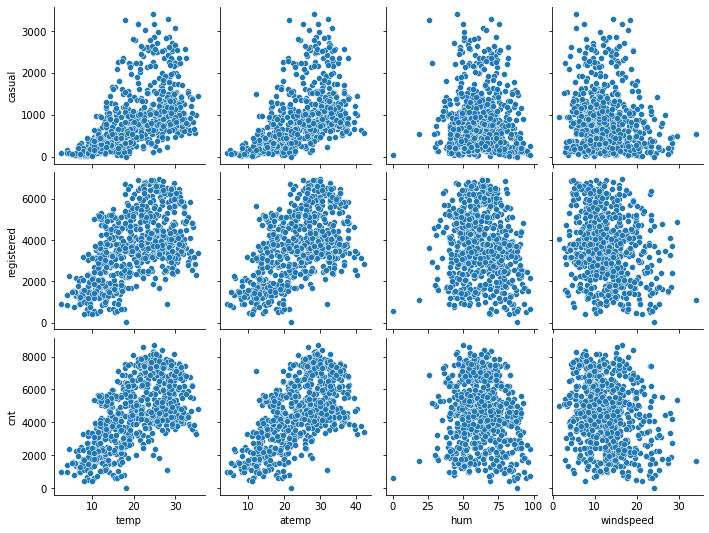

In [6]:
plt.figure(figsize=(20, 12))
sns.pairplot(data = df,x_vars=["temp","atemp","hum","windspeed"],
             y_vars=["casual","registered","cnt"])
plt.show()

Here we can tell there is a linear increase in cnt with respect to temp,atemp
With respect to humidity and windspeed, its much of a dispersed pattern

#### Visualizing Categorical Variables

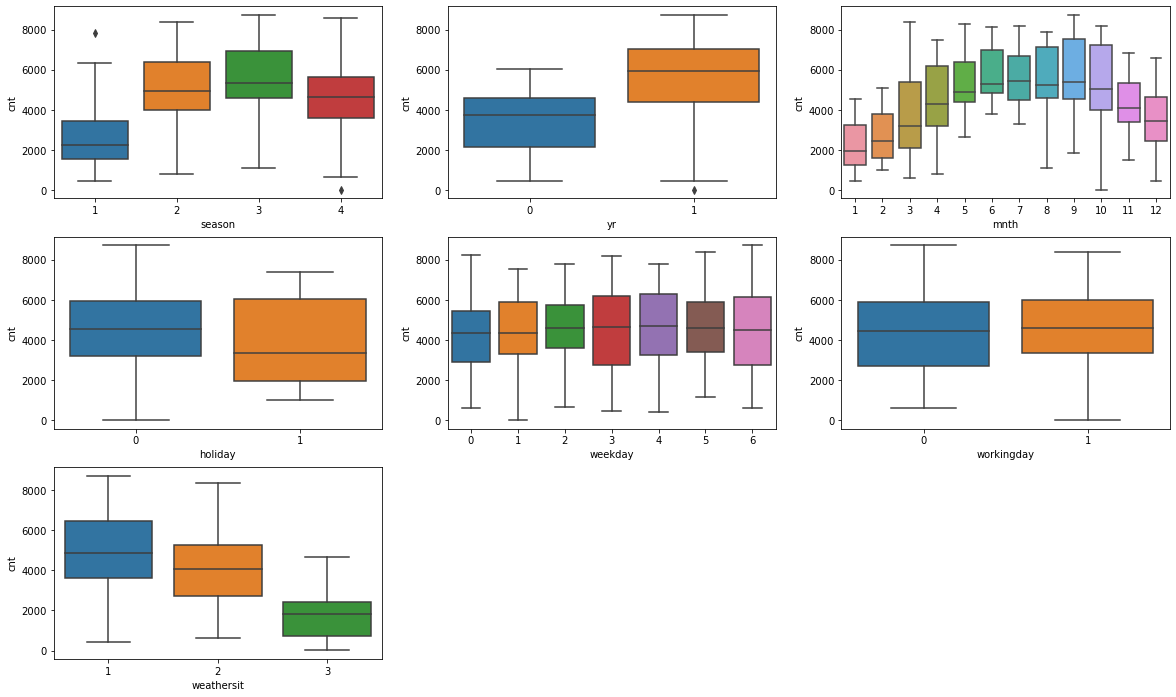

In [7]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

We can see that in the fall we have maximum number of users and in the summer the least - as it is sunny outside
and we can also see that august, september and october have peaks
In light and heavy rains the bikes used are less which is intuitely correct

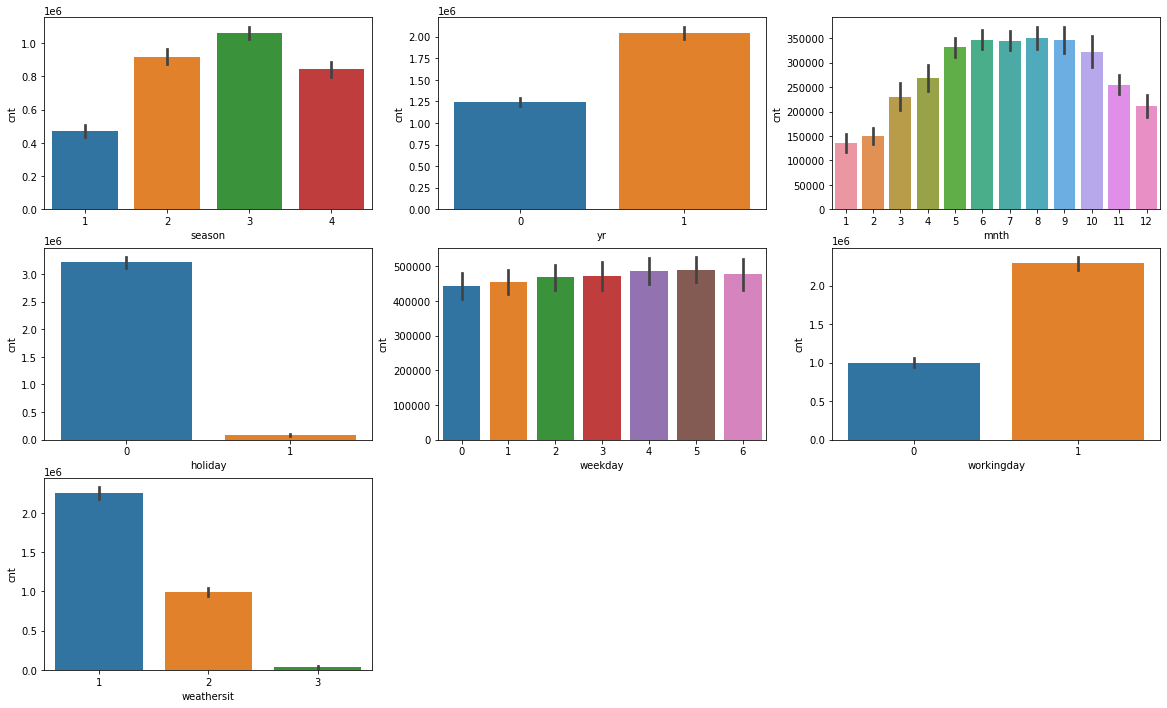

In [8]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.barplot(x = 'season', y = 'cnt', data = df,estimator=np.sum)
plt.subplot(3,3,2)
sns.barplot(x = 'yr', y = 'cnt', data = df,estimator=np.sum)
plt.subplot(3,3,3)
sns.barplot(x = 'mnth', y = 'cnt', data = df,estimator=np.sum)
plt.subplot(3,3,4)
sns.barplot(x = 'holiday', y = 'cnt', data = df,estimator=np.sum)
plt.subplot(3,3,5)
sns.barplot(x = 'weekday', y = 'cnt', data = df,estimator=np.sum)
plt.subplot(3,3,6)
sns.barplot(x = 'workingday', y = 'cnt', data = df,estimator=np.sum)
plt.subplot(3,3,7)
sns.barplot(x = 'weathersit', y = 'cnt', data = df,estimator=np.sum)
plt.show()

In the above we can see that more bikes are being used during workdays most probably for daily work.

<AxesSubplot:>

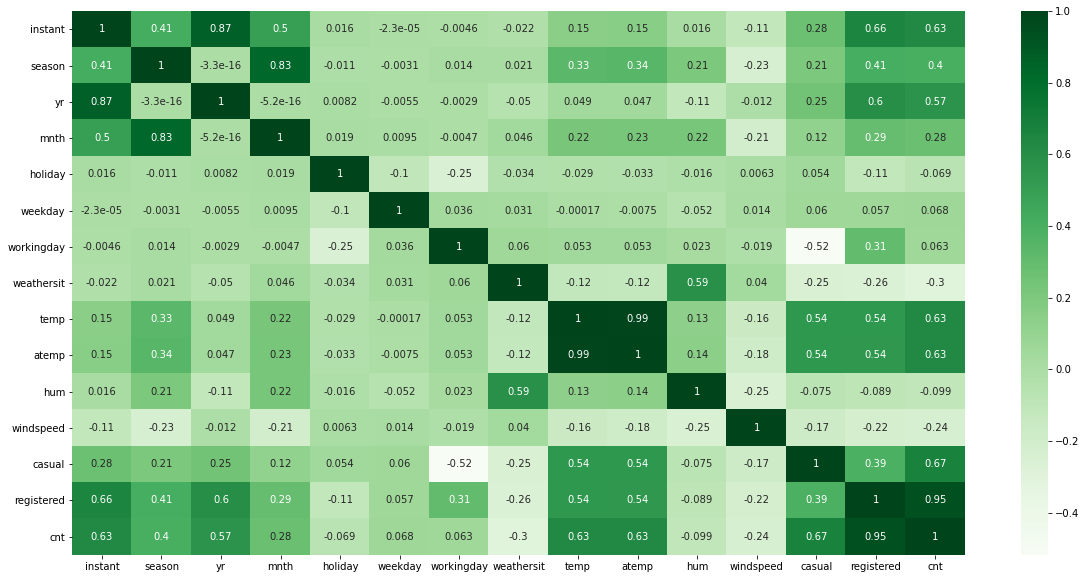

In [9]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True,cmap="Greens") # Checking the correlation among the variables

## 3 Data Preparation

Here we can extract, standardize/normalize, derive additional data.Basically to create a model we need to standardize the value so that we can establish correct correlation among variables and thus get the proper model

### 3.1 Data Glance
Glancing the data to see the required operations

In [10]:
#Lets look at the data and see again
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Looking and glancing at the data we can do the following for Data Preparation:
- 1. Derive/Modify/Create new variables 
   - drop the instant column
   - create the number of days column from dte day
   - make the year column as year extracted from dteday as it is a year column so it will increase like 2018,2019,2020 so it makes more sense to do that
   - can drop the columns casual and registered as it is not needed for the model as we are considering only the total cnt variable
- 2. Create Dummy vairables
   - Season,weathersit,month,weekday can be converted to dummy variables using levels
- 3. Split Dataset into test and train
- 4. Normalize the Data
   - temp,atemp,hum,windspeed,cnt can be normalized

### 3.2 Derive/Modify/Create Variables

Here we intend to drop the columns instant,casual and registered and derive data from dteday

In [11]:
df.drop(axis=1,columns=["instant","casual","registered"], inplace=True)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# Deriving date columns
from datetime import date
pd.Series
d0 = pd.to_datetime(pd.Series([ date(2018, 1, 1) for i in range(df.shape[0])]))
d1 = pd.to_datetime(df.dteday,dayfirst =True)
df["days"] = d1 - d0 
df["yr"] = pd.DatetimeIndex(df.dteday).year
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days
0,01-01-2018,1,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0 days
1,02-01-2018,1,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1 days
2,03-01-2018,1,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2 days
3,04-01-2018,1,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3 days
4,05-01-2018,1,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4 days


Now we can derive day column derived from dteday and put in different column and then drop dteday as we have split the variables into different columns 

In [13]:
#Deriving date 
df['days'] = df['days'].astype(str)
df['days'] = df['days'].map(lambda x: x[0:2])
df['days'] = df['days'].astype(int)

In [14]:
df["day_month"] = pd.DatetimeIndex(df["dteday"],dayfirst=True).day
df["week_month"] = pd.DatetimeIndex(df["dteday"],dayfirst=True).week
df.drop(axis=1,columns=["dteday"], inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days,day_month,week_month
0,1,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,1,1
1,1,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,2,1
2,1,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2,3,1
3,1,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3,4,1
4,1,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4,5,1


### 3.3 Create Dummy Variables

Here for season and weathersit we can consider taking the category to different levels.
lets check

In [15]:
df1 = pd.get_dummies(data = df, columns =['season','mnth','weekday','weathersit'], drop_first = True)
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,day_month,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,0,0,0,0,0,1,1,0
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,801,1,2,...,0,0,0,0,0,0,0,0,1,0
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,3,...,0,0,1,0,0,0,0,0,0,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,4,...,0,0,0,1,0,0,0,0,0,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,5,...,0,0,0,0,1,0,0,0,0,0


### 3.4 Split Dataset

We need to split the data set into train and test

In [16]:
from sklearn.model_selection import train_test_split

# Splitting the data set and then setting random so that the sample data doesnt change everytime
df_train, df_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)
df_train.head()

(510, 33)
(219, 33)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,day_month,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,2019,0,1,19.201653,23.0423,55.8333,12.208807,7534,65,16,...,0,0,0,1,0,0,0,0,0,0
576,2019,0,1,29.246653,33.1448,70.4167,11.083475,7216,57,31,...,0,0,0,1,0,0,0,0,0,0
426,2019,0,0,16.980847,20.6746,62.1250,10.792293,4066,42,3,...,0,0,0,0,0,0,0,1,1,0
728,2019,0,0,10.489153,11.5850,48.3333,23.500518,1796,72,30,...,0,1,0,0,0,0,0,0,0,0
482,2019,0,0,15.443347,18.8752,48.9583,8.708325,4220,48,28,...,0,0,0,0,0,0,0,1,1,0


### 3.5 Rescaling Features

Here are going to scale the following features: yr,month,weekday,temp.atemp,hum,windspeed,cnt,days,day_month

In [17]:
# importing and defining the necessary variable
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
continuous_columns = ["yr","temp","atemp","hum","windspeed","cnt","days","day_month","week_month"]
df_train[continuous_columns] = scaler.fit_transform(df_train[continuous_columns])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,day_month,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1.0,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0.677083,0.500000,...,0,0,0,1,0,0,0,0,0,0
576,1.0,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0.593750,1.000000,...,0,0,0,1,0,0,0,0,0,0
426,1.0,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0.437500,0.066667,...,0,0,0,0,0,0,0,1,1,0
728,1.0,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0.750000,0.966667,...,0,1,0,0,0,0,0,0,0,0
482,1.0,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0.500000,0.900000,...,0,0,0,0,0,0,0,1,1,0


### 4 Data Modelling

This is where we build the different machine learning models with their respective statistics
First lets visualize the correlation then we can use RFE method to evaluate the necessary features and then build the model

### 4.1 Visualizing the Data

Lets find the correlation matrix

<AxesSubplot:>

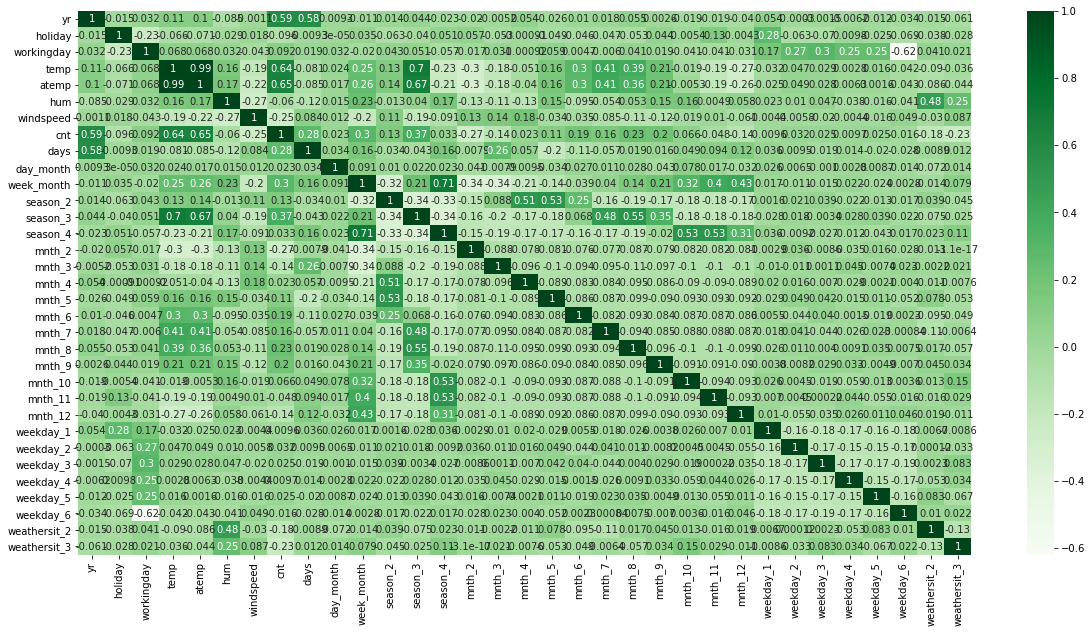

In [19]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_train.corr(),annot = True,cmap="Greens") # Checking the correlation among the variables

We can see that the main variables effecting the cnt are yr,month,temp,atemp,days,season3

Here we can see the ranking of the different features, True tells to include the feature. 
### 4.2 Building the model
So now lets try building the model

In [20]:
# Import the necessary libraries
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  

### Model 1 (Based on EDA Understanding and Correlation)

Now lets check the included columns and add/remove based on the EDA understanding
Looking at the correlation matrix we know that:
- yr - significant variable
- days
- week_month
- season_3
- month_7 to month_9

Looking at the graphs the influencing factor can be
- holiday
- weathersit
- workingday
- windspeed (-ve)

In [21]:
eda_columns = ['yr','days','week_month','season_3','mnth_6','mnth_7','mnth_8','mnth_9',
           'holiday','workingday','windspeed','weathersit_2','weathersit_3']

In [22]:
y_train = df_train.pop('cnt')
X_train = df_train
print(y_train.shape)
print(X_train.shape)
X_train.head()

(510,)
(510, 32)


,yr,holiday,workingday,temp,atemp,hum,windspeed,days,day_month,week_month,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1.0,0,1,0.509887,0.501133,0.575354,0.300794,0.677083,0.500000,0.803922,...,0,0,0,1,0,0,0,0,0,0
576,1.0,0,1,0.815169,0.766351,0.725633,0.264686,0.593750,1.000000,0.588235,...,0,0,0,1,0,0,0,0,0,0
426,1.0,0,0,0.442393,0.438975,0.640189,0.255342,0.437500,0.066667,0.156863,...,0,0,0,0,0,0,0,1,1,0
728,1.0,0,0,0.245101,0.200348,0.498067,0.663106,0.750000,0.966667,0.000000,...,0,1,0,0,0,0,0,0,0,0
482,1.0,0,0,0.395666,0.391735,0.504508,0.188475,0.500000,0.900000,0.313725,...,0,0,0,0,0,0,0,1,1,0


In [23]:
# Creating X_test dataframe with RFE selected variables
X_train_eda = X_train[eda_columns]
# Adding a constant variable 
X_train_eda = sm.add_constant(X_train_eda)

In [24]:
lm_1 = sm.OLS(y_train,X_train_eda).fit()

In [25]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     78.89
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.20e-111
Time:                        19:48:19   Log-Likelihood:                 324.34
No. Observations:                 510   AIC:                            -620.7
Df Residuals:                     496   BIC:                            -561.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3402      0.023     14.746      0.000       0.295       0.386
yr               0.2718      0.014     18.811      0.000       0.243       0.300
days            -0.0851      0.036     -2.394      0.017      -0.155      -0.015
week_month       0.1886      0.021      8.928      0.000       0.147       0.230
season_3        -0.0369      0.033     -1.129      0.259      -0.101       0.027
mnth_6           0.1791      0.026      6.974      0.000       0.129       0.230
mnth_7           0.1617      0.040      4.079      0.000       0.084       0.240
mnth_8           0.1762      0.039      4.564      0.000       0.100       0.252
mnth_9           0.1925      0.034      5.691      0.000       0.126       0.259
holiday         -0.1079      0.038     -2.851      0.005      -0.182      -0.034
workingday       0.0280      0.013      2.200      0.028       0.003       0.053
windspeed       -0.1527      0.036     -4.279      0.000      -0.223      -0.083
weathersit_2    -0.0833      0.012     -6.700      0.000      -0.108      -0.059
weathersit_3    -0.2776      0.035     -7.961      0.000      -0.346      -0.209
==============================================================================
Omnibus:                        8.057   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.018   Jarque-Bera (JB):               11.040
Skew:                          -0.127   Prob(JB):                      0.00401
Kurtosis:                       3.675   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_eda.columns
vif['VIF'] = [variance_inflation_factor(X_train_eda.values, i) for i in range(X_train_eda.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16.09
4,season_3,6.27
7,mnth_8,3.91
6,mnth_7,3.35
8,mnth_9,2.56
2,days,1.65
1,yr,1.58
5,mnth_6,1.38
3,week_month,1.19
11,windspeed,1.11


We can see that season_3 as high VIF also days has high p value

### Model 2 (Using RFE)

### Feature Selection
Now lets use RFE method to find out the significant variables.
First need to divide into X and Y sets for the model building

In [27]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE

# Running RFE with the output number of the variable equal to 10
lm_2 = LinearRegression()
lm_2.fit(X_train, y_train)

rfe = RFE(lm_2, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days', False, 2),
 ('day_month', False, 16),
 ('week_month', False, 7),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 8),
 ('mnth_3', False, 3),
 ('mnth_4', False, 5),
 ('mnth_5', False, 4),
 ('mnth_6', False, 6),
 ('mnth_7', False, 10),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 15),
 ('mnth_12', False, 14),
 ('weekday_1', False, 11),
 ('weekday_2', False, 12),
 ('weekday_3', False, 17),
 ('weekday_4', False, 18),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [28]:
included_columns = X_train.columns[rfe.support_]
excluded_columns = X_train.columns[~rfe.support_]
print("Included Columns:",included_columns)
print("Excluded Columns:",excluded_columns)

Included Columns: Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')
Excluded Columns: Index(['atemp', 'days', 'day_month', 'week_month', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5'],
      dtype='object')


In [29]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[included_columns]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [30]:
lm_2 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [31]:
#Let's see the summary of our linear model
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.89e-191
Time:                        19:48:20   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1950      0.029      6.791      0.000       0.139       0.251
yr               0.2301      0.008     28.776      0.000       0.214       0.246
holiday         -0.0546      0.027     -2.033      0.043      -0.107      -0.002
workingday       0.0446      0.012      3.877      0.000       0.022       0.067
temp             0.4960      0.034     14.803      0.000       0.430       0.562
hum             -0.1623      0.037     -4.353      0.000      -0.235      -0.089
windspeed       -0.1824      0.025     -7.200      0.000      -0.232      -0.133
season_2         0.1175      0.015      7.985      0.000       0.089       0.146
season_3         0.0295      0.022      1.346      0.179      -0.014       0.073
season_4         0.1430      0.013     10.688      0.000       0.117       0.169
mnth_8           0.0475      0.017      2.745      0.006       0.013       0.081
mnth_9           0.1178      0.017      6.895      0.000       0.084       0.151
mnth_10          0.0442      0.017      2.565      0.011       0.010       0.078
weekday_6        0.0533      0.015      3.676      0.000       0.025       0.082
weathersit_2    -0.0592      0.010     -5.702      0.000      -0.080      -0.039
weathersit_3    -0.2523      0.026     -9.655      0.000      -0.304      -0.201
==============================================================================
Omnibus:                       77.307   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.274
Skew:                          -0.748   Prob(JB):                     5.94e-46
Kurtosis:                       5.751   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.48
8,season_3,6.04
4,temp,3.71
7,season_2,2.60
9,season_4,2.17
5,hum,1.91
3,workingday,1.88
13,weekday_6,1.79
10,mnth_8,1.68
14,weathersit_2,1.58


Here season_3 is having higher VIF value as well as P value . Now lets build a modified RFE model

### Model 3 (Modified RFE)

Here we can consider that temp is a better way than atemp to measure the effectiveness, additionally we can see that season 3 has higher VIF as well as p value
So first lets try with removing season_3 variable and try

In [33]:
modified_included_columns = [ column for column in included_columns if column not in ['season_3']]
print(modified_included_columns)

['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6', 'weathersit_2', 'weathersit_3']


In [34]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe_modified = X_train[modified_included_columns]
# Adding a constant variable 
X_train_rfe_modified = sm.add_constant(X_train_rfe_modified)

In [35]:
lm_3 = sm.OLS(y_train,X_train_rfe_modified).fit()   # Running the linear model

In [36]:
#Let's see the summary of our linear model
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.24e-192
Time:                        19:48:21   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1945      0.029      6.770      0.000       0.138       0.251
yr               0.2292      0.008     28.743      0.000       0.213       0.245
holiday         -0.0558      0.027     -2.078      0.038      -0.109      -0.003
workingday       0.0444      0.012      3.850      0.000       0.022       0.067
temp             0.5301      0.022     24.136      0.000       0.487       0.573
hum             -0.1692      0.037     -4.580      0.000      -0.242      -0.097
windspeed       -0.1857      0.025     -7.359      0.000      -0.235      -0.136
season_2         0.1039      0.011      9.680      0.000       0.083       0.125
season_4         0.1348      0.012     11.316      0.000       0.111       0.158
mnth_8           0.0560      0.016      3.478      0.001       0.024       0.088
mnth_9           0.1255      0.016      7.783      0.000       0.094       0.157
mnth_10          0.0411      0.017      2.403      0.017       0.007       0.075
weekday_6        0.0529      0.015      3.647      0.000       0.024       0.081
weathersit_2    -0.0582      0.010     -5.618      0.000      -0.079      -0.038
weathersit_3    -0.2486      0.026     -9.559      0.000      -0.300      -0.197
==============================================================================
Omnibus:                       71.668   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.034
Skew:                          -0.713   Prob(JB):                     2.96e-40
Kurtosis:                       5.555   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_modified.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_modified.values, i) for i in range(X_train_rfe_modified.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.47
3,workingday,1.88
5,hum,1.88
12,weekday_6,1.79
8,season_4,1.72
4,temp,1.59
13,weathersit_2,1.57
11,mnth_10,1.49
9,mnth_8,1.46
7,season_2,1.38


In [38]:
#Seems all have significant values , now lets try building with atemp instead of temp
modified_included_columns_atemp = modified_included_columns 
modified_included_columns_atemp[3] = 'atemp'
print(modified_included_columns)

['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'season_2', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6', 'weathersit_2', 'weathersit_3']


In [39]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe_modified_atemp = X_train[modified_included_columns_atemp]
# Adding a constant variable 
X_train_rfe_modified_atemp = sm.add_constant(X_train_rfe_modified_atemp)
lm_3 = sm.OLS(y_train,X_train_rfe_modified_atemp).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.2
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          8.44e-189
Time:                        19:48:21   Log-Likelihood:                 511.02
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     495   BIC:                            -928.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1931      0.029      6.603      0.000       0.136       0.251
yr               0.2299      0.008     28.392      0.000       0.214       0.246
holiday         -0.0524      0.027     -1.917      0.056      -0.106       0.001
workingday       0.0445      0.012      3.806      0.000       0.022       0.068
atemp            0.5515      0.024     23.424      0.000       0.505       0.598
hum             -0.1733      0.038     -4.611      0.000      -0.247      -0.099
windspeed       -0.1681      0.026     -6.530      0.000      -0.219      -0.117
season_2         0.1017      0.011      9.290      0.000       0.080       0.123
season_4         0.1288      0.012     10.676      0.000       0.105       0.153
mnth_8           0.0699      0.016      4.330      0.000       0.038       0.102
mnth_9           0.1301      0.016      7.965      0.000       0.098       0.162
mnth_10          0.0415      0.017      2.386      0.017       0.007       0.076
weekday_6        0.0528      0.015      3.579      0.000       0.024       0.082
weathersit_2    -0.0586      0.011     -5.564      0.000      -0.079      -0.038
weathersit_3    -0.2415      0.026     -9.128      0.000      -0.294      -0.190
==============================================================================
Omnibus:                       64.352   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.735
Skew:                          -0.601   Prob(JB):                     4.66e-41
Kurtosis:                       5.701   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_modified_atemp.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_modified_atemp.values, i) for i in range(X_train_rfe_modified_atemp.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.61
3,workingday,1.88
5,hum,1.88
12,weekday_6,1.79
8,season_4,1.71
4,atemp,1.57
13,weathersit_2,1.57
11,mnth_10,1.49
9,mnth_8,1.42
7,season_2,1.39


## 5 Model Evaluation

Now we have built three models, now lets analyse each of these models and validate the assumptions of Linear regression and then test it with the test data.
Here the model 3 appears to have higher F-statistic and good R-score value of 0.839 and has all significant values and lower VIF values as calculated.
Now lets analyse it with the test data

In [41]:
#Lets the params coefficient of model 3
lm_3.params

const           0.193062
yr              0.229935
holiday        -0.052357
workingday      0.044549
atemp           0.551503
hum            -0.173334
windspeed      -0.168054
season_2        0.101653
season_4        0.128813
mnth_8          0.069939
mnth_9          0.130134
mnth_10         0.041477
weekday_6       0.052767
weathersit_2   -0.058617
weathersit_3   -0.241540
dtype: float64

### 5.1 Residual Analysis of Training Data

Lets check in the training data how it is performing

In [42]:
y_train_cnt = lm_3.predict(X_train_rfe_modified_atemp)

Text(0.5, 0, 'Errors')

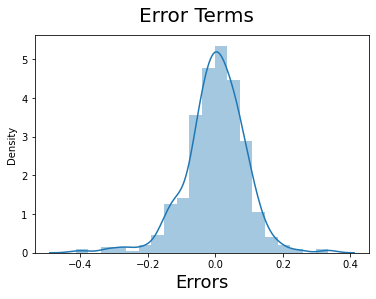

In [43]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)           

Here the error terms seems to be normally distributed thus validating our assumption
### 5.2 Making Predictions using Final Model

Now lets make our prediction using our final model

In [44]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,day_month,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,2018,1,0,29.793347,33.27085,63.7917,5.459106,6043,18,4,...,0,0,1,0,0,0,0,0,1,0
535,2019,0,1,32.082500,36.04875,59.2083,7.625404,6211,53,20,...,0,0,0,0,1,0,0,0,0,0
299,2018,0,1,19.270000,22.85230,81.2917,13.250121,2659,29,27,...,0,0,0,0,0,1,0,0,1,0
221,2018,0,1,31.433347,34.24915,42.4167,13.417286,4780,22,10,...,0,0,0,0,1,0,0,0,0,0
152,2018,0,1,29.315000,32.19710,30.5000,19.583229,4968,15,2,...,0,0,0,0,0,1,0,0,0,0


In [45]:
# First lets apply the transformation applied to it
df_test[continuous_columns] = scaler.transform(df_test[continuous_columns]) 
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,day_month,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0.0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0.187500,0.100000,...,0,0,1,0,0,0,0,0,1,0
535,1.0,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0.552083,0.633333,...,0,0,0,0,1,0,0,0,0,0
299,0.0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0.302083,0.866667,...,0,0,0,0,0,1,0,0,1,0
221,0.0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0.229167,0.300000,...,0,0,0,0,1,0,0,0,0,0
152,0.0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0.156250,0.033333,...,0,0,0,0,0,1,0,0,0,0


In [46]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,day_month,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.424134,0.500609,...,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.215641,0.285836,...,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.031250,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.229167,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.416667,0.466667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.583333,0.766667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.031250,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [47]:
y_test = df_test.pop('cnt')
X_test = df_test

In [48]:
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,days,day_month,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,1.0,0.0,1,0,0.831783,0.769660,0.657364,0.084219,0.187500,0.100000,...,0,0,1,0,0,0,0,0,1,0
535,1.0,1.0,0,1,0.901354,0.842587,0.610133,0.153728,0.552083,0.633333,...,0,0,0,0,1,0,0,0,0,0
299,1.0,0.0,0,1,0.511964,0.496145,0.837699,0.334206,0.302083,0.866667,...,0,0,0,0,0,1,0,0,1,0
221,1.0,0.0,0,1,0.881625,0.795343,0.437098,0.339570,0.229167,0.300000,...,0,0,0,0,1,0,0,0,0,0
152,1.0,0.0,0,1,0.817246,0.741471,0.314298,0.537414,0.156250,0.033333,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1.0,0,0,0.257562,0.243430,0.708888,0.287411,0.416667,0.133333,...,0,0,0,0,0,0,0,0,1,0
702,1.0,1.0,0,1,0.519232,0.511907,0.756118,0.283397,0.729167,0.100000,...,0,1,0,1,0,0,0,0,0,0
127,1.0,0.0,0,0,0.584649,0.577380,0.650923,0.069510,0.125000,0.233333,...,0,0,0,0,0,0,0,0,0,0
640,1.0,1.0,0,1,0.745598,0.682653,0.817947,0.052115,0.666667,0.066667,...,0,0,0,0,1,0,0,0,1,0


In [49]:
y_test_pred = lm_3.predict(X_test_sm[X_train_rfe_modified_atemp.columns])
y_test_pred

184    0.378461
535    0.902297
299    0.421544
221    0.613354
152    0.603394
         ...   
400    0.327458
702    0.699991
127    0.488633
640    0.805169
72     0.297762
Length: 219, dtype: float64

### 5.3 Validating Assumptions of Linear Regression

#### 1. Plotting Error Terms to be in Normal Distribution

Text(0.5, 0, 'Errors')

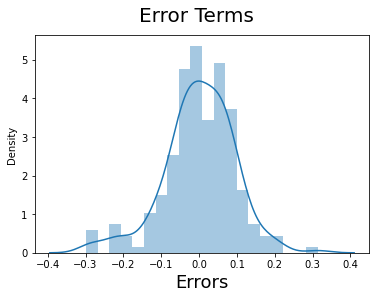

In [50]:
#Lets predict the error terms 
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

#### 2. Proving the linearity of the model by plotting actual vs predicted values

Text(0, 0.5, 'y_pred')

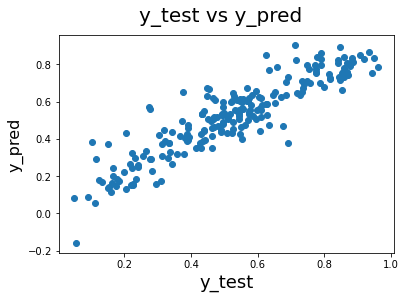

In [51]:
# In the above it gives us a normal distribution of Error terms
# Lets also plot the predicted vs actual values
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

#### 3. VIF 

Here we have already calculated the VIF among the variables and all are below 2 
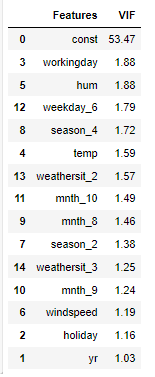

#### 4.Calculating the residuals

Text(0, 0.5, 'Y Values')

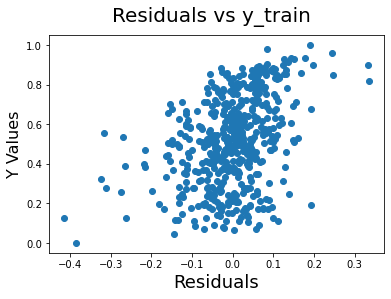

In [52]:
fig = plt.figure()
plt.scatter(lm_3.resid, y_train)
fig.suptitle('Residuals vs y_train', fontsize = 20)              # Plot heading 
plt.xlabel('Residuals', fontsize = 18)                          # X-label
plt.ylabel('Y Values', fontsize = 16) 
# Below we can see that there is no pattern hence homoscedasticityis proven

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.00869781053678249
r_square_value : 0.8168720382804856


In [54]:
#Lets list down the metrics with the training model also:
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.2
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          8.44e-189
Time:                        19:48:24   Log-Likelihood:                 511.02
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     495   BIC:                            -928.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1931      0.029      6.603      0.000       0.136       0.251
yr               0.2299      0.008     28.392      0.000       0.214       0.246
holiday         -0.0524      0.027     -1.917      0.056      -0.106       0.001
workingday       0.0445      0.012      3.806      0.000       0.022       0.068
atemp            0.5515      0.024     23.424      0.000       0.505       0.598
hum             -0.1733      0.038     -4.611      0.000      -0.247      -0.099
windspeed       -0.1681      0.026     -6.530      0.000      -0.219      -0.117
season_2         0.1017      0.011      9.290      0.000       0.080       0.123
season_4         0.1288      0.012     10.676      0.000       0.105       0.153
mnth_8           0.0699      0.016      4.330      0.000       0.038       0.102
mnth_9           0.1301      0.016      7.965      0.000       0.098       0.162
mnth_10          0.0415      0.017      2.386      0.017       0.007       0.076
weekday_6        0.0528      0.015      3.579      0.000       0.024       0.082
weathersit_2    -0.0586      0.011     -5.564      0.000      -0.079      -0.038
weathersit_3    -0.2415      0.026     -9.128      0.000      -0.294      -0.190
==============================================================================
Omnibus:                       64.352   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.735
Skew:                          -0.601   Prob(JB):                     4.66e-41
Kurtosis:                       5.701   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 Hence on the train as well as test we are getting a good R-score and F-statistic is also good hence we can finalize this model
 The assumptions of Linear regression are also validated above .ie., the normal distribution of errors 